<center> <h1> Data Science - jak nauczyć algorytm rozróżniać owoce świeże od zgniłych? </h1> 
 <h1> Data: 19.10.2022 </h1> 
 <h2> Autor: Mateusz Dalba [Future Collars] </h2> </center>

In [2]:
#Import libraries
import os
import datetime

import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Activation, Dropout, Flatten
from keras.models import Model, Sequential
from keras.utils import np_utils

In [3]:
dir_=r'D:\fruiots'
classlist=os.listdir(dir_)

In [4]:
classlist

['fresh_apple',
 'fresh_banana',
 'fresh_bitter_gourd',
 'fresh_capsicum',
 'fresh_orange',
 'fresh_tomato',
 'ImageLabels.txt',
 'stale_apple',
 'stale_banana',
 'stale_bitter_gourd',
 'stale_capsicum',
 'stale_orange',
 'stale_tomato',
 'test',
 'train']

In [5]:
filepaths=[]
labels=[]

for klass in classlist:
    if klass not in ('ImageLabels.txt','test','train'):
        print(klass)
        classpath=os.path.join(dir_,klass)
        if os.path.isdir(classpath):
            flist=os.listdir(classpath)
            for f in flist:
                fpath=os.path.join(classpath,f)
                filepaths.append(fpath)
                labels.append(klass)

fresh_apple
fresh_banana
fresh_bitter_gourd
fresh_capsicum
fresh_orange
fresh_tomato
stale_apple
stale_banana
stale_bitter_gourd
stale_capsicum
stale_orange
stale_tomato


In [6]:
Fseries= pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')    
df=pd.concat([Fseries, Lseries], axis=1)

In [7]:
df

,filepaths,labels
0,D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...,fresh_apple
1,D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...,fresh_apple
2,D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...,fresh_apple
3,D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...,fresh_apple
4,D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...,fresh_apple
...,...,...
14677,D:\fruiots\stale_tomato\DSCN4239.jpg_0_9768.jpg,stale_tomato
14678,D:\fruiots\stale_tomato\DSCN4239.jpg_0_9787.jpg,stale_tomato
14679,D:\fruiots\stale_tomato\DSCN4239.jpg_0_9792.jpg,stale_tomato
14680,D:\fruiots\stale_tomato\DSCN4239.jpg_0_9820.jpg,stale_tomato


In [8]:
df['filepaths'][0]

'D:\\fruiots\\fresh_apple\\rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png'

In [9]:
df['labels'].value_counts()

stale_apple           2342
fresh_apple           1693
stale_orange          1595
fresh_banana          1581
stale_banana          1467
fresh_orange          1466
fresh_capsicum         990
stale_tomato           982
fresh_tomato           981
stale_capsicum         901
stale_bitter_gourd     357
fresh_bitter_gourd     327
Name: labels, dtype: int64

In [30]:
example_pic = df['filepaths'][3500]

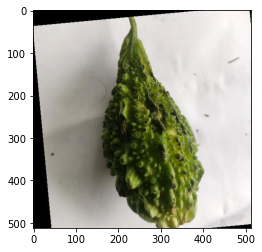

In [31]:
image = load_img(example_pic)
plt.grid(False)
plt.imshow(image)

In [19]:
X = df['filepaths']
y = df['labels']

In [20]:
X

0        D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...
1        D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...
2        D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...
3        D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...
4        D:\fruiots\fresh_apple\rotated_by_15_Screen Sh...
                               ...                        
14677      D:\fruiots\stale_tomato\DSCN4239.jpg_0_9768.jpg
14678      D:\fruiots\stale_tomato\DSCN4239.jpg_0_9787.jpg
14679      D:\fruiots\stale_tomato\DSCN4239.jpg_0_9792.jpg
14680      D:\fruiots\stale_tomato\DSCN4239.jpg_0_9820.jpg
14681      D:\fruiots\stale_tomato\DSCN4239.jpg_0_9947.jpg
Name: filepaths, Length: 14682, dtype: object

In [21]:
y

0         fresh_apple
1         fresh_apple
2         fresh_apple
3         fresh_apple
4         fresh_apple
             ...     
14677    stale_tomato
14678    stale_tomato
14679    stale_tomato
14680    stale_tomato
14681    stale_tomato
Name: labels, Length: 14682, dtype: object

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)

In [33]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [35]:
test

,filepaths,labels
8542,D:\fruiots\stale_apple\saltandpepper_Screen Sh...,stale_apple
8217,D:\fruiots\stale_apple\rotated_by_75_Screen Sh...,stale_apple
9023,D:\fruiots\stale_apple\translation_Screen Shot...,stale_apple
10933,D:\fruiots\stale_bitter_gourd\IMG_20200824_182...,stale_bitter_gourd
11103,D:\fruiots\stale_bitter_gourd\IMG_20200826_172...,stale_bitter_gourd
...,...,...
567,D:\fruiots\fresh_apple\rotated_by_45_Screen Sh...,fresh_apple
9868,D:\fruiots\stale_banana\rotated_by_60_Screen S...,stale_banana
6075,D:\fruiots\fresh_tomato\DSCN4068.jpg_0_4780.jpg,fresh_tomato
2245,D:\fruiots\fresh_banana\rotated_by_60_Screen S...,fresh_banana


In [36]:
train['partition'] = 0
test['partition'] = 1

In [37]:
df_images = pd.concat([train,test])

In [38]:
df_images

,filepaths,labels,partition
9976,D:\fruiots\stale_banana\rotated_by_75_Screen S...,stale_banana,0
7516,D:\fruiots\stale_apple\rotated_by_30_Screen Sh...,stale_apple,0
9856,D:\fruiots\stale_banana\rotated_by_60_Screen S...,stale_banana,0
11647,D:\fruiots\stale_capsicum\WhatsApp Image 2020-...,stale_capsicum,0
239,D:\fruiots\fresh_apple\rotated_by_30_Screen Sh...,fresh_apple,0
...,...,...,...
567,D:\fruiots\fresh_apple\rotated_by_45_Screen Sh...,fresh_apple,1
9868,D:\fruiots\stale_banana\rotated_by_60_Screen S...,stale_banana,1
6075,D:\fruiots\fresh_tomato\DSCN4068.jpg_0_4780.jpg,fresh_tomato,1
2245,D:\fruiots\fresh_banana\rotated_by_60_Screen S...,fresh_banana,1


In [39]:
import shutil

In [40]:
df_images['labels'].unique()

array(['stale_banana', 'stale_apple', 'stale_capsicum', 'fresh_apple',
       'fresh_orange', 'fresh_banana', 'stale_tomato', 'fresh_tomato',
       'stale_orange', 'fresh_capsicum', 'fresh_bitter_gourd',
       'stale_bitter_gourd'], dtype=object)

In [67]:
df_images

,filepaths,labels,partition
9976,D:\fruiots\stale_banana\rotated_by_75_Screen S...,stale_banana,0
7516,D:\fruiots\stale_apple\rotated_by_30_Screen Sh...,stale_apple,0
9856,D:\fruiots\stale_banana\rotated_by_60_Screen S...,stale_banana,0
11647,D:\fruiots\stale_capsicum\WhatsApp Image 2020-...,stale_capsicum,0
239,D:\fruiots\fresh_apple\rotated_by_30_Screen Sh...,fresh_apple,0
...,...,...,...
567,D:\fruiots\fresh_apple\rotated_by_45_Screen Sh...,fresh_apple,1
9868,D:\fruiots\stale_banana\rotated_by_60_Screen S...,stale_banana,1
6075,D:\fruiots\fresh_tomato\DSCN4068.jpg_0_4780.jpg,fresh_tomato,1
2245,D:\fruiots\fresh_banana\rotated_by_60_Screen S...,fresh_banana,1


In [68]:
for i,item in df_images.iterrows():
    name = df_images['filepaths'][i].split('\\')[-1]
    print(name)
    folder = df_images['labels'][i]
    
    if df_images['partition'][i] == 0:
        shutil.copy(df_images['filepaths'][i], 'D:\\fruiots\\train\\' + folder + '\\' + name)
    elif df_images['partition'][i] == 1:
        shutil.copy(df_images['filepaths'][i], 'D:\\fruiots\\test\\' +  folder + '\\' + name)

rotated_by_75_Screen Shot 2018-06-12 at 8.54.48 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.41.16 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.02.24 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpeg_0_840.jpg
rotated_by_30_Screen Shot 2018-06-08 at 5.07.18 PM.png
Screen Shot 2018-06-07 at 2.16.41 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.01.03 AM.png
Screen Shot 2018-06-07 at 2.45.35 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.15.14 PM.png
Screen Shot 2018-06-12 at 9.27.52 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 10.07.21 PM.png
Screen Shot 2018-06-08 at 5.08.05 PM.png
WhatsApp Image 2020-11-07 at 11.43.16 PM.jpg_0_9477.jpg
IMG_20200901_181743.jpg_0_2807.jpg
translation_Screen Shot 2018-06-12 at 9.43.59 PM.png
vertical_flip_Screen Shot 2018-06-07 at 3.03.46 PM.png
Screen Shot 2018-06-12 at 10.05.35 PM.png
vertical_flip_Screen Shot 2018-06-08 at 2.46.25 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 3.00.25 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 P

rotated_by_60_Screen Shot 2018-06-08 at 2.49.27 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.28.07 PM.png
IMG_20200823_131855.jpg_0_9027.jpg
rotated_by_75_Screen Shot 2018-06-07 at 2.17.15 PM.png
rotated_by_30_Screen Shot 2018-06-13 at 12.00.35 AM.png
IMG_20200725_095418.jpg_0_4687.jpg
vertical_flip_Screen Shot 2018-06-13 at 12.13.19 AM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM (1).jpg_0_5614.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.50.04 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.39.35 PM.png
IMG_20200901_181736.jpg_0_1284.jpg
WhatsApp Image 2020-11-07 at 11.35.37 PM(1).jpg_0_2712.jpg
saltandpepper_Screen Shot 2018-06-12 at 11.22.21 PM.png
DSCN4209.jpg_0_6599.jpg
Screen Shot 2018-06-12 at 9.13.39 PM.png
IMG_20200725_095424.jpg_0_5886.jpg
capsicum3_0.jpg_0_2168.jpg
IMG_20200901_181743.jpg_0_2203.jpg
DSCN4209.jpg_0_3298.jpg
vertical_flip_Screen Shot 2018-06-08 at 2.42.52 PM.png
Screen Shot 2018-06-08 at 2.33.49 PM.png
translation_Screen Shot 2018-06-08 at 5.34.07 PM.pn

rotated_by_15_Screen Shot 2018-06-12 at 9.53.07 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.21.25 PM.png
Screen Shot 2018-06-12 at 11.55.48 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.54.55 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.24.37 PM.png
rotated_by_15_Screen Shot 2018-06-13 at 12.11.17 AM.png
saltandpepper_Screen Shot 2018-06-13 at 12.03.34 AM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.11.27 PM.png
Screen Shot 2018-06-12 at 9.11.05 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.03.34 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.55.00 PM.png
IMG_20200901_181728.jpg_0_1032.jpg
DSCN4209.jpg_0_2716.jpg
vertical_flip_Screen Shot 2018-06-12 at 11.36.48 PM.png
translation_Screen Shot 2018-06-12 at 9.03.34 PM.png
Screen Shot 2018-06-08 at 2.51.43 PM.png
rotated_by_30_Screen Shot 2018-06-13 at 12.04.34 AM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.59.28 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.43.48 PM.png
IMG_20200822_223854.jpg_0_6312.jpg
rotated

DSCN4172.jpg_0_8111.jpg
translation_Screen Shot 2018-06-12 at 9.40.49 PM.png
translation_Screen Shot 2018-06-12 at 11.23.33 PM.png
translation_Screen Shot 2018-06-08 at 2.30.03 PM.png
WhatsApp Image 2020-11-07 at 11.35.37 PM(1).jpeg_0_7056.jpg
vertical_flip_Screen Shot 2018-06-12 at 11.57.45 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 8.49.25 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.50.09 PM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM.jpeg_0_3391.jpg
rotated_by_15_Screen Shot 2018-06-13 at 12.13.35 AM.png
rotated_by_60_Screen Shot 2018-06-08 at 2.43.29 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.57.13 PM.png
IMG_20200826_172321.jpg_0_2776.jpg
Screen Shot 2018-06-07 at 2.15.50 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.45.58 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.53.51 PM.png
DSCN4101.jpg_0_6212.jpg
Day1A.jpg_0_4788.jpg
translation_Screen Shot 2018-06-12 at 9.16.53 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.15.21 AM.png
rotated_by_15_Screen Shot 2

capsicum3_6.jpg_0_6161.jpg
tomato1_13.jpg_0_5915.jpg
Screen Shot 2018-06-13 at 12.08.09 AM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.32.13 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.54.41 PM.png
DSCN4222.jpg_0_9673.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.40.10 PM.png
DSCN4070.jpg_0_5988.jpg
vertical_flip_Screen Shot 2018-06-12 at 9.52.37 PM.png
WhatsApp Image 2020-11-07 at 11.43.16 PM.jpg_0_5980.jpg
IMG_20200823_131901.jpg_0_581.jpg
Copy of IMG_20200801_191346.jpg_0_9456.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.54.27 PM.png
tomato1_19.jpg_0_4476.jpg
translation_Screen Shot 2018-06-12 at 11.52.12 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.02.38 PM.png
Screen Shot 2018-06-13 at 12.16.16 AM.png
translation_Screen Shot 2018-06-12 at 11.57.45 PM.png
tomato1_26.jpg_0_3995.jpg
saltandpepper_Screen Shot 2018-06-12 at 9.21.05 PM.png
IMG_20200901_181735.jpg_0_6259.jpg
rotated_by_15_Screen Shot 2018-06-13 at 12.06.10 AM.png
rotated_by_45_Screen Shot 2018-06-13 at 12.0

rotated_by_60_Screen Shot 2018-06-12 at 11.18.28 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.20.51 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.02.08 PM.png
IMG_20200901_181731.jpg_0_4990.jpg
Screen Shot 2018-06-12 at 9.18.43 PM.png
WhatsApp Image 2020-11-07 at 11.30.46 PM.jpeg_0_6151.jpg
vertical_flip_Screen Shot 2018-06-08 at 2.37.13 PM.png
IMG_20200826_172321.jpg_0_7748.jpg
Screen Shot 2018-06-12 at 11.45.28 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 10.01.41 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 8.48.40 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.42.20 PM.png
IMG_20200901_181739.jpg_0_9046.jpg
rotated_by_45_Screen Shot 2018-06-07 at 2.24.02 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.19.28 PM.png
Screen Shot 2018-06-08 at 5.22.53 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.18.51 PM.png
IMG_20200825_144639.jpg_0_1445.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.03.06 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 10.01.46 PM.png
rotated_by_45_S

capsicum3_13.jpg_0_2955.jpg
rotated_by_45_Screen Shot 2018-06-08 at 2.26.09 PM.png
Copy of IMG_20200727_223202.jpg_0_9484.jpg
Copy of IMG_20200730_170244.jpg_0_6432.jpg
rotated_by_45_Screen Shot 2018-06-08 at 2.39.35 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.58.16 PM.png
translation_Screen Shot 2018-06-08 at 2.50.25 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.21.48 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.54.20 PM.png
Screen Shot 2018-06-08 at 5.28.15 PM.png
saltandpepper_Screen Shot 2018-06-07 at 2.15.20 PM.png
rotated_by_15_Screen Shot 2018-06-13 at 12.07.32 AM.png
capsicum3_7.jpg_0_4910.jpg
DSCN4113.jpg_0_9358.jpg
IMG_20200824_182336.jpg_0_3019.jpg
rotated_by_60_Screen Shot 2018-06-12 at 8.47.41 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.10.03 PM.png
saltandpepper_Screen Shot 2018-06-13 at 12.11.02 AM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.16.44 PM.png
IMG_20200825_144655.jpg_0_2664.jpg
rotated_by_75_Screen Shot 2018-06-13 at 12.02.41 AM.png
rotate

rotated_by_60_Screen Shot 2018-06-12 at 9.54.35 PM.png
saltandpepper_Screen Shot 2018-06-13 at 12.11.28 AM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.54.18 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 8.54.43 PM.png
vertical_flip_Screen Shot 2018-06-07 at 3.04.41 PM.png
Screen Shot 2018-06-12 at 9.52.58 PM.png
Copy of IMG_20200730_170235.jpg_0_9477.jpg
rotated_by_45_Screen Shot 2018-06-12 at 9.52.06 PM.png
Screen Shot 2018-06-08 at 2.26.34 PM.png
rotated_by_30_Screen Shot 2018-06-13 at 12.16.08 AM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.02.33 AM.png
Screen Shot 2018-06-08 at 5.13.18 PM.png
rotated_by_45_Screen Shot 2018-06-07 at 2.34.18 PM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM.jpg_0_1426.jpg
rotated_by_15_Screen Shot 2018-06-12 at 8.49.20 PM.png
rotated_by_45_Screen Shot 2018-06-07 at 2.24.47 PM.png
vertical_flip_Screen Shot 2018-06-12 at 10.01.58 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM.jpg_0_6124.jpg
vertical_flip_Screen Shot 2018-06-08 at 5.05.41 PM.png
rot

WhatsApp Image 2020-11-07 at 11.35.36 PM.jpeg_0_9290.jpg
rotated_by_45_Screen Shot 2018-06-08 at 5.26.29 PM.png
IMG_20200823_131808.jpg_0_4964.jpg
saltandpepper_Screen Shot 2018-06-13 at 12.08.58 AM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.41.26 PM.png
WhatsApp Image 2020-11-07 at 11.43.16 PM.jpeg_0_564.jpg
IMG_20200901_181739.jpg_0_6820.jpg
Screen Shot 2018-06-12 at 11.31.52 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.33.27 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.47.49 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.51.58 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.53.57 PM.png
DSCN4068.jpg_0_4246.jpg
Screen Shot 2018-06-12 at 9.58.16 PM.png
DSCN4171.jpg_0_559.jpg
rotated_by_60_Screen Shot 2018-06-13 at 12.15.01 AM.png
vertical_flip_Screen Shot 2018-06-08 at 2.36.23 PM.png
IMG_20200823_131812.jpg_0_69.jpg
translation_Screen Shot 2018-06-13 at 12.16.33 AM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.16.16 PM.png
translation_Screen Shot 2018-06-12 at 8.52.16 P

IMG_20200824_182221.jpg_0_647.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.43.53 PM.png
Screen Shot 2018-06-12 at 11.31.01 PM.png
DSCN4238.jpg_0_4782.jpg
vertical_flip_Screen Shot 2018-06-07 at 2.55.52 PM.png
translation_Screen Shot 2018-06-13 at 12.06.15 AM.png
saltandpepper_Screen Shot 2018-06-12 at 11.43.10 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.10.21 PM.png
IMG_20200823_131855.jpg_0_6775.jpg
tomato1_15.jpg_0_4287.jpg
IMG_20200824_182248.jpg_0_2275.jpg
Screen Shot 2018-06-12 at 11.22.41 PM.png
translation_Screen Shot 2018-06-12 at 9.50.53 PM.png
IMG_20200823_131904.jpg_0_2727.jpg
Screen Shot 2018-06-12 at 11.25.55 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.45.15 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.19.28 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.34.49 PM.png
DSCN4070.jpg_0_342.jpg
rotated_by_30_Screen Shot 2018-06-07 at 2.57.05 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.05.27 PM.png
Screen Shot 2018-06-07 at 2.56.34 PM.png
capsicum3_8.jpg_0_

rotated_by_75_Screen Shot 2018-06-12 at 9.46.02 PM.png
IMG_20200824_182241.jpg_0_2350.jpg
Screen Shot 2018-06-08 at 2.35.03 PM.png
translation_Screen Shot 2018-06-07 at 3.04.04 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.56.34 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.38.19 PM.png
vertical_flip_Screen Shot 2018-06-08 at 2.31.16 PM.png
saltandpepper_Screen Shot 2018-06-13 at 12.01.36 AM.png
Screen Shot 2018-06-12 at 9.08.22 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.11.16 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.29.55 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 2.33.49 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.19.28 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.55.13 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.59.41 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.26.58 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.10.04 AM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.43.39 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.22.12 PM.png
W

saltandpepper_Screen Shot 2018-06-12 at 11.43.36 PM.png
capsicum3_10.jpg_0_7164.jpg
saltandpepper_Screen Shot 2018-06-08 at 2.38.08 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.57.49 PM.png
Copy of IMG_20200802_134638.jpg_0_8592.jpg
rotated_by_45_Screen Shot 2018-06-08 at 5.24.19 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.04.12 AM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.03.10 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.25.37 PM.png
WhatsApp Image 2020-11-07 at 11.35.37 PM.jpeg_0_945.jpg
rotated_by_30_Screen Shot 2018-06-12 at 9.02.03 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.56.48 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.44.54 PM.png
Copy of IMG_20200730_170235.jpg_0_2954.jpg
rotated_by_30_Screen Shot 2018-06-12 at 11.41.48 PM.png
Copy of IMG_20200727_223213.jpg_0_6623.jpg
rotated_by_30_Screen Shot 2018-06-12 at 9.50.16 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.48.39 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.18.57 PM.png
DSCN4114.jpg_

translation_Screen Shot 2018-06-12 at 9.51.24 PM.png
IMG_20200824_182241.jpg_0_819.jpg
rotated_by_15_Screen Shot 2018-06-07 at 2.24.59 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.27.34 PM.png
saltandpepper_Screen Shot 2018-06-08 at 2.31.03 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.33.50 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.36.06 PM.png
IMG_20200824_182316.jpg_0_7126.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.18.07 PM.png
IMG_20200824_182230.jpg_0_9756.jpg
IMG_20200822_223831.jpg_0_1574.jpg
WhatsApp Image 2020-11-07 at 11.35.36 PM.jpg_0_5964.jpg
Screen Shot 2018-06-07 at 2.43.54 PM.png
capsicum3_6.jpg_0_740.jpg
tomato1_38.jpg_0_4566.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.54.56 PM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM.jpeg_0_9814.jpg
translation_Screen Shot 2018-06-08 at 5.02.54 PM.png
IMG_20200901_181736.jpg_0_5640.jpg
Copy of IMG_20200802_134638.jpg_0_6821.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.10.55 PM.png
rotated_by_45_Screen Shot 201

IMG_20200826_172325.jpg_0_4946.jpg
translation_Screen Shot 2018-06-08 at 2.40.46 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.03.27 AM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.18.53 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.26.55 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 4.59.44 PM.png
saltandpepper_Screen Shot 2018-06-13 at 12.04.01 AM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.13.31 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.58.43 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.11.23 PM.png
translation_Screen Shot 2018-06-13 at 12.04.51 AM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.56.43 PM.png
Screen Shot 2018-06-12 at 9.53.57 PM.png
IMG_20200822_223840.jpg_0_2590.jpg
Screen Shot 2018-06-13 at 12.02.45 AM.png
translation_Screen Shot 2018-06-08 at 5.17.10 PM.png
translation_Screen Shot 2018-06-12 at 9.49.32 PM.png
Screen Shot 2018-06-12 at 9.44.30 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.11.05 PM.png
rotated_by_30_Screen Shot 2018-06-08 a

capsicum3_12.jpg_0_2653.jpg
Copy of IMG_20200801_191346.jpg_0_463.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.08.00 PM.png
translation_Screen Shot 2018-06-13 at 12.16.16 AM.png
saltandpepper_Screen Shot 2018-06-13 at 12.18.07 AM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.33.05 PM.png
Copy of IMG_20200727_223213.jpg_0_9929.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.43.27 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.27.26 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.19.58 PM.png
IMG_20200725_095424.jpg_0_7320.jpg
rotated_by_75_Screen Shot 2018-06-08 at 2.34.37 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.57.37 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 8.50.20 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.42.10 PM.png
IMG_20200901_181751.jpg_0_3114.jpg
vertical_flip_Screen Shot 2018-06-08 at 5.05.48 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.28.15 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.34.13 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.4

Copy of IMG_20200729_164219.jpg_0_2965.jpg
DSCN4209.jpg_0_992.jpg
vertical_flip_Screen Shot 2018-06-12 at 10.07.13 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 8.48.40 PM.png
Screen Shot 2018-06-12 at 11.22.36 PM.png
IMG_20200824_182248.jpg_0_1640.jpg
vertical_flip_Screen Shot 2018-06-12 at 9.47.27 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.55.28 PM.png
IMG_20200901_181751.jpg_0_6024.jpg
Screen Shot 2018-06-12 at 11.41.26 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.44.36 PM.png
Copy of IMG_20200730_170235.jpg_0_7266.jpg
rotated_by_30_Screen Shot 2018-06-12 at 11.43.03 PM.png
DSCN4187.jpg_0_7222.jpg
WhatsApp Image 2020-11-07 at 11.30.47 PM (1).jpg_0_7751.jpg
rotated_by_30_Screen Shot 2018-06-07 at 3.03.58 PM.png
rotated_by_45_Screen Shot 2018-06-07 at 3.06.30 PM.png
WhatsApp Image 2020-11-07 at 11.43.17 PM.jpeg_0_1652.jpg
Screen Shot 2018-06-08 at 5.03.05 PM.png
Copy of IMG_20200801_191339.jpg_0_2587.jpg
tomato1_6.jpg_0_2568.jpg
Screen Shot 2018-06-08 at 5.14.07 PM.png
IMG

saltandpepper_Screen Shot 2018-06-12 at 9.55.53 PM.png
DSCN4114.jpg_0_3030.jpg
Screen Shot 2018-06-13 at 12.20.21 AM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.24.17 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpeg_0_5383.jpg
saltandpepper_Screen Shot 2018-06-08 at 2.25.24 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.40.36 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.43.59 PM.png
translation_Screen Shot 2018-06-07 at 2.31.43 PM.png
translation_Screen Shot 2018-06-12 at 11.32.13 PM.png
translation_Screen Shot 2018-06-08 at 5.06.19 PM.png
Screen Shot 2018-06-12 at 11.36.06 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.50.38 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.07.52 PM.png
rotated_by_15_Screen Shot 2018-06-13 at 12.08.41 AM.png
IMG_20200901_181739.jpg_0_8990.jpg
saltandpepper_Screen Shot 2018-06-12 at 11.40.18 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.45.28 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.14.01 PM.png
saltandpepper_Screen Shot 2

rotated_by_45_Screen Shot 2018-06-12 at 9.42.49 PM.png
capsicum3_13.jpg_0_7145.jpg
rotated_by_45_Screen Shot 2018-06-12 at 11.56.35 PM.png
Screen Shot 2018-06-12 at 9.40.49 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.18.51 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.23.33 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.25.04 PM.png
IMG_20200824_182316.jpg_0_2144.jpg
rotated_by_75_Screen Shot 2018-06-12 at 8.54.37 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.05.18 PM.png
Screen Shot 2018-06-12 at 9.07.26 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 8.47.51 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.57.38 PM.png
vertical_flip_Screen Shot 2018-06-08 at 2.31.45 PM.png
vertical_flip_Screen Shot 2018-06-13 at 12.09.25 AM.png
Screen Shot 2018-06-13 at 12.18.02 AM.png
translation_Screen Shot 2018-06-12 at 11.33.43 PM.png
Screen Shot 2018-06-12 at 11.52.55 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.29.51 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.45.12 PM.p

WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7622.jpg
rotated_by_30_Screen Shot 2018-06-08 at 2.46.25 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.11.24 PM.png
rotated_by_15_Screen Shot 2018-06-13 at 12.11.02 AM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.14.03 AM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM.jpg_0_452.jpg
rotated_by_45_Screen Shot 2018-06-13 at 12.09.25 AM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.16.53 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.59.12 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.02.38 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.30.35 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.08.52 PM.png
DSCN4102.jpg_0_1577.jpg
rotated_by_75_Screen Shot 2018-06-08 at 5.04.16 PM.png
IMG_20200822_223831.jpg_0_4222.jpg
Copy of IMG_20200801_191339.jpg_0_6850.jpg
vertical_flip_Screen Shot 2018-06-13 at 12.10.38 AM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.31.52 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 2.52.20 PM.png
rotated_by_

Screen Shot 2018-06-08 at 5.17.22 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.45.28 PM.png
DSCN4223.jpg_0_5278.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.06.56 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.27.30 PM.png
IMG_20200824_182336.jpg_0_4221.jpg
DSCN4223.jpg_0_1606.jpg
DSCN4172.jpg_0_1913.jpg
DSCN4223.jpg_0_3878.jpg
rotated_by_30_Screen Shot 2018-06-08 at 2.37.19 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.31.01 PM.png
capsicum3_5.jpg_0_5565.jpg
IMG_20200823_131904.jpg_0_2760.jpg
saltandpepper_Screen Shot 2018-06-12 at 11.58.43 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 2.36.01 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.27.46 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpeg_0_1840.jpg
IMG_20200823_131812.jpg_0_656.jpg
saltandpepper_Screen Shot 2018-06-08 at 2.36.55 PM.png
Day2.jpg_0_6901.jpg
tomato1_13.jpg_0_8491.jpg
WhatsApp Image 2020-11-07 at 11.35.37 PM.jpg_0_5615.jpg
rotated_by_60_Screen Shot 2018-06-08 at 5.02.24 PM.png
IMG_20200822_223

rotated_by_30_Screen Shot 2018-06-12 at 8.49.52 PM.png
Screen Shot 2018-06-12 at 11.19.08 PM.png
translation_Screen Shot 2018-06-08 at 5.33.11 PM.png
IMG_20200823_131901.jpg_0_8107.jpg
DSCN4223.jpg_0_2122.jpg
saltandpepper_Screen Shot 2018-06-07 at 2.31.59 PM.png
tomato1_30.jpg_0_8132.jpg
rotated_by_15_Screen Shot 2018-06-07 at 2.56.16 PM.png
translation_Screen Shot 2018-06-12 at 9.11.43 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 8.51.56 PM.png
Day2.jpg_0_6775.jpg
rotated_by_30_Screen Shot 2018-06-08 at 5.08.52 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.21.22 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.23.07 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.45.18 PM.png
vertical_flip_Screen Shot 2018-06-07 at 3.04.10 PM.png
Screen Shot 2018-06-12 at 11.55.05 PM.png
IMG_20200825_144547.jpg_0_4334.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.07.19 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.17.31 AM.png
rotated_by_45_Screen Shot 2018-06-12 at 10.05.29 PM.png
Day3.jp

DSCN4142.jpg_0_9481.jpg
rotated_by_60_Screen Shot 2018-06-07 at 2.53.57 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.29.31 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.19.58 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.23.10 PM.png
DSCN4142.jpg_0_5730.jpg
rotated_by_30_Screen Shot 2018-06-12 at 9.38.29 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.32.21 PM.png
Copy of IMG_20200729_164206.jpg_0_3278.jpg
rotated_by_15_Screen Shot 2018-06-08 at 5.06.54 PM.png
capsicum3_6.jpg_0_8661.jpg
rotated_by_15_Screen Shot 2018-06-07 at 2.47.50 PM.png
translation_Screen Shot 2018-06-08 at 2.35.37 PM.png
IMG_20200824_182336.jpg_0_368.jpg
translation_Screen Shot 2018-06-12 at 9.38.10 PM.png
capsicum3_7.jpg_0_9600.jpg
saltandpepper_Screen Shot 2018-06-12 at 11.44.16 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.25.34 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.18.41 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.31.33 PM.png
DSCN4114.jpg_0_2591.jpg
IMG_20200822_223846.jpg_0_14

rotated_by_30_Screen Shot 2018-06-07 at 2.47.50 PM.png
saltandpepper_Screen Shot 2018-06-12 at 8.55.53 PM.png
translation_Screen Shot 2018-06-12 at 11.27.55 PM.png
Copy of IMG_20200727_223205.jpg_0_3772.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.42.03 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.12.47 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 3.05.05 PM.png
IMG_20200823_131904.jpg_0_5469.jpg
rotated_by_15_Screen Shot 2018-06-08 at 5.12.14 PM.png
WhatsApp Image 2020-11-07 at 11.35.37 PM.jpg_0_56.jpg
IMG_20200901_181739.jpg_0_4813.jpg
Screen Shot 2018-06-12 at 9.42.44 PM.png
Screen Shot 2018-06-12 at 11.18.41 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.02.31 PM.png
DSCN4171.jpg_0_5013.jpg
rotated_by_30_Screen Shot 2018-06-12 at 9.00.11 PM.png
translation_Screen Shot 2018-06-12 at 9.17.33 PM.png
WhatsApp Image 2020-11-07 at 11.30.46 PM.jpeg_0_820.jpg
Screen Shot 2018-06-12 at 9.20.01 PM.png
capsicum3_13.jpg_0_1842.jpg
tomato1_38.jpg_0_3297.jpg
rotated_by_30_Screen Shot 20

IMG_20200824_182216.jpg_0_7644.jpg
IMG_20200725_095424.jpg_0_74.jpg
IMG_20200822_223840.jpg_0_9363.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.13.10 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.23.14 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.06.40 PM.png
tomato1_6.jpg_0_8524.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.08.12 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.01.27 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.29.18 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.41.57 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.18.16 PM.png
tomato1_19.jpg_0_9335.jpg
rotated_by_75_Screen Shot 2018-06-08 at 5.18.58 PM.png
IMG_20200822_223837.jpg_0_1455.jpg
translation_Screen Shot 2018-06-08 at 2.51.55 PM.png
rotated_by_45_Screen Shot 2018-06-07 at 3.00.46 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.25.33 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.22.35 PM.png
Copy of IMG_20200801_191339.jpg_0_3717.jpg
translation_Screen Shot 2018-06-12 at 9.06.56 PM.png
ro

rotated_by_60_Screen Shot 2018-06-12 at 9.57.17 PM.png
Copy of IMG_20200802_134642.jpg_0_2974.jpg
rotated_by_45_Screen Shot 2018-06-13 at 12.07.32 AM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.56.09 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.42.38 PM.png
capsicum3_5.jpg_0_1397.jpg
vertical_flip_Screen Shot 2018-06-13 at 12.20.25 AM.png
Screen Shot 2018-06-12 at 11.45.57 PM.png
Screen Shot 2018-06-12 at 8.55.15 PM.png
capsicum3_4.jpg_0_8239.jpg
Screen Shot 2018-06-12 at 10.06.59 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.34.18 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.26.28 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.56.23 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.32.33 PM.png
Day3.jpg_0_5019.jpg
rotated_by_60_Screen Shot 2018-06-13 at 12.13.58 AM.png
rotated_by_75_Screen Shot 2018-06-08 at 2.36.18 PM.png
vertical_flip_Screen Shot 2018-06-12 at 9.55.42 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.25.26 PM.png
saltandpepper_Screen Shot 2018-06-12 

DSCN4221.jpg_0_2453.jpg
IMG_20200823_131855.jpg_0_1073.jpg
rotated_by_30_Screen Shot 2018-06-12 at 10.05.35 PM.png
Copy of IMG_20200801_191346.jpg_0_2690.jpg
Copy of IMG_20200727_223202.jpg_0_1614.jpg
rotated_by_75_Screen Shot 2018-06-12 at 11.51.02 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.04.46 AM.png
DSCN4158.jpg_0_8607.jpg
translation_Screen Shot 2018-06-08 at 5.34.01 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.21.14 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.16.28 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.08.26 PM.png
IMG_20200901_181735.jpg_0_745.jpg
rotated_by_75_Screen Shot 2018-06-08 at 5.24.19 PM.png
bitter-gourd 1.jpg_0_8351.jpg
rotated_by_60_Screen Shot 2018-06-08 at 2.37.13 PM.png
DSCN4102.jpg_0_490.jpg
Screen Shot 2018-06-12 at 9.53.41 PM.png
vertical_flip_Screen Shot 2018-06-13 at 12.09.37 AM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.31.33 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpg_0_3464.jpg
Screen Shot 2018-06-12 at 9.25.54 PM.

WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_7173.jpg
rotated_by_60_Screen Shot 2018-06-08 at 5.17.34 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.57.42 PM.png
translation_Screen Shot 2018-06-07 at 2.51.01 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.00.17 AM.png
IMG_20200824_182216.jpg_0_354.jpg
capsicum3_1.jpg_0_4317.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.19.56 PM.png
WhatsApp Image 2020-11-07 at 11.43.16 PM.jpeg_0_313.jpg
vertical_flip_Screen Shot 2018-06-12 at 9.56.28 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.59.48 PM.png
rotated_by_15_Screen Shot 2018-06-13 at 12.17.31 AM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.10.04 PM.png
Screen Shot 2018-06-12 at 9.57.08 PM.png
capsicum3_9.jpg_0_7416.jpg
saltandpepper_Screen Shot 2018-06-13 at 12.05.19 AM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.25.16 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 2.36.31 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.47.54 PM.png
vertical_flip_Screen Shot 2018-06-12 at 1

translation_Screen Shot 2018-06-07 at 2.15.20 PM.png
translation_Screen Shot 2018-06-12 at 11.21.35 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.56.03 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.09.17 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.00.03 PM.png
DSCN4158.jpg_0_120.jpg
translation_Screen Shot 2018-06-08 at 5.27.06 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 10.02.24 PM.png
translation_Screen Shot 2018-06-12 at 11.29.26 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.36.06 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.07.32 PM.png
tomato1_8.jpg_0_8733.jpg
rotated_by_45_Screen Shot 2018-06-13 at 12.03.27 AM.png
capsicum3_6.jpg_0_4952.jpg
translation_Screen Shot 2018-06-12 at 9.39.13 PM.png
tomato1_38.jpg_0_9307.jpg
IMG_20200825_144612.jpg_0_3372.jpg
rotated_by_30_Screen Shot 2018-06-12 at 11.52.40 PM.png
Screen Shot 2018-06-08 at 5.27.49 PM.png
Copy of IMG_20200727_223205.jpg_0_3735.jpg
IMG_20200822_223846.jpg_0_4101.jpg
rotated_by_75_Screen Shot 2018-06-1

translation_Screen Shot 2018-06-07 at 2.20.04 PM.png
IMG_20200822_223831.jpg_0_1854.jpg
translation_Screen Shot 2018-06-12 at 8.47.51 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 8.58.53 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 3.03.46 PM.png
Screen Shot 2018-06-12 at 10.06.33 PM.png
Screen Shot 2018-06-08 at 5.11.24 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.28.24 PM.png
capsicum3_7.jpg_0_3198.jpg
rotated_by_45_Screen Shot 2018-06-07 at 2.43.07 PM.png
IMG_20200825_144655.jpg_0_4130.jpg
Screen Shot 2018-06-13 at 12.19.08 AM.png
WhatsApp Image 2020-11-07 at 11.30.46 PM.jpg_0_6372.jpg
rotated_by_30_Screen Shot 2018-06-12 at 11.43.10 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.54.18 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.57.52 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.59.02 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.46.32 PM.png
IMG_20200822_223831.jpg_0_3511.jpg
IMG_20200824_182212.jpg_0_954.jpg
IMG_20200823_131904.jpg_0_6515.jpg
DSCN4187.jpg_0_

vertical_flip_Screen Shot 2018-06-12 at 9.50.12 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.31.39 PM.png
Copy of IMG_20200727_223213.jpg_0_9915.jpg
rotated_by_15_Screen Shot 2018-06-07 at 3.04.47 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 3.03.31 PM.png
Copy of IMG_20200730_170232.jpg_0_6263.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.41.03 PM.png
capsicum3_8.jpg_0_2396.jpg
saltandpepper_Screen Shot 2018-06-07 at 2.23.02 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.44.30 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 8.48.46 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.09.55 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.53.51 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.52.26 PM.png
capsicum3_5.jpg_0_3830.jpg
vertical_flip_Screen Shot 2018-06-12 at 9.53.03 PM.png
IMG_20200825_144644.jpg_0_5679.jpg
saltandpepper_Screen Shot 2018-06-12 at 9.04.19 PM.png
saltandpepper_Screen Shot 2018-06-08 at 2.50.49 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 10.06.59 PM.pn

rotated_by_30_Screen Shot 2018-06-08 at 2.47.03 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.30.26 PM.png
DSCN4210.jpg_0_692.jpg
Day4A.jpg_0_8230.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.13.04 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.20.42 PM.png
translation_Screen Shot 2018-06-12 at 11.39.19 PM.png
DSCN4114.jpg_0_8847.jpg
Screen Shot 2018-06-08 at 5.16.49 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.51.29 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.13.45 PM.png
IMG_20200830_103413.jpg_0_556.jpg
vertical_flip_Screen Shot 2018-06-12 at 11.56.02 PM.png
translation_Screen Shot 2018-06-12 at 10.06.19 PM.png
capsicum3_1.jpg_0_2362.jpg
capsicum3_5.jpg_0_7866.jpg
rotated_by_30_Screen Shot 2018-06-12 at 11.54.10 PM.png
translation_Screen Shot 2018-06-13 at 12.10.27 AM.png
Copy of IMG_20200802_134638.jpg_0_2636.jpg
Day3.jpg_0_8977.jpg
Screen Shot 2018-06-12 at 11.38.19 PM.png
Screen Shot 2018-06-08 at 5.00.18 PM.png
Screen Shot 2018-06-12 at 10.01.37 PM.png
rotated_by_

WhatsApp Image 2020-11-07 at 11.30.46 PM.jpg_0_7058.jpg
vertical_flip_Screen Shot 2018-06-08 at 5.21.44 PM.png
Screen Shot 2018-06-08 at 5.00.50 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.47.08 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.27.34 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 10.02.19 PM.png
vertical_flip_Screen Shot 2018-06-12 at 10.05.41 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.03.34 AM.png
tomato1_6.jpg_0_8358.jpg
vertical_flip_Screen Shot 2018-06-12 at 9.53.46 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 10.04.54 PM.png
translation_Screen Shot 2018-06-08 at 5.26.47 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.42.05 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.11.23 PM.png
vertical_flip_Screen Shot 2018-06-12 at 9.56.33 PM.png
saltandpepper_Screen Shot 2018-06-12 at 8.55.41 PM.png
capsicum3_9.jpg_0_5788.jpg
DSCN4210.jpg_0_2259.jpg
saltandpepper_Screen Shot 2018-06-08 at 2.45.58 PM.png
IMG_20200823_131901.jpg_0_5904.jpg
saltandpepper_Scre

rotated_by_15_Screen Shot 2018-06-12 at 9.11.43 PM.png
translation_Screen Shot 2018-06-08 at 5.04.59 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.14.48 PM.png
translation_Screen Shot 2018-06-08 at 5.29.13 PM.png
WhatsApp Image 2020-11-07 at 11.43.16 PM.jpg_0_8990.jpg
rotated_by_45_Screen Shot 2018-06-12 at 11.27.26 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.02.45 AM.png
Screen Shot 2018-06-12 at 9.04.19 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.06.21 PM.png
Copy of IMG_20200730_170244.jpg_0_1174.jpg
vertical_flip_Screen Shot 2018-06-08 at 2.25.17 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.51.24 PM.png
IMG_20200901_181739.jpg_0_398.jpg
rotated_by_30_Screen Shot 2018-06-12 at 11.42.00 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.13.24 AM.png
vertical_flip_Screen Shot 2018-06-12 at 9.46.07 PM.png
Screen Shot 2018-06-13 at 12.17.55 AM.png
IMG_20200901_181728.jpg_0_3797.jpg
Copy of IMG_20200801_191346.jpg_0_1492.jpg
WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0

rotated_by_30_Screen Shot 2018-06-08 at 5.11.08 PM.png
IMG_20200826_172243.jpg_0_6231.jpg
Copy of IMG_20200729_164157.jpg_0_6012.jpg
rotated_by_45_Screen Shot 2018-06-12 at 11.53.33 PM.png
Screen Shot 2018-06-12 at 9.42.49 PM.png
IMG_20200823_131903.jpg_0_2000.jpg
Copy of IMG_20200801_191346.jpg_0_9527.jpg
rotated_by_60_Screen Shot 2018-06-13 at 12.16.08 AM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.41.18 PM.png
DSCN4068.jpg_0_2580.jpg
rotated_by_60_Screen Shot 2018-06-08 at 2.53.14 PM.png
rotated_by_15_Screen Shot 2018-06-13 at 12.01.49 AM.png
rotated_by_45_Screen Shot 2018-06-13 at 12.03.55 AM.png
tomato1_15.jpg_0_9640.jpg
Copy of IMG_20200727_223202.jpg_0_2079.jpg
Screen Shot 2018-06-07 at 2.47.35 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.28.04 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.51.47 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.15.01 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.56.28 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.18.57 PM.png
rota

Screen Shot 2018-06-13 at 12.00.17 AM.png
translation_Screen Shot 2018-06-08 at 2.31.16 PM.png
IMG_20200823_131855.jpg_0_8585.jpg
rotated_by_75_Screen Shot 2018-06-08 at 2.31.23 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.50.44 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.25.11 PM.png
translation_Screen Shot 2018-06-12 at 11.41.35 PM.png
saltandpepper_Screen Shot 2018-06-08 at 2.51.43 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.53.07 PM.png
DSCN4187.jpg_0_6772.jpg
Screen Shot 2018-06-08 at 5.26.24 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.26.44 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.03.12 PM.png
Copy of IMG_20200730_170244.jpg_0_7905.jpg
saltandpepper_Screen Shot 2018-06-08 at 5.12.56 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.16.34 PM.png
IMG_20200825_144547.jpg_0_3207.jpg
Screen Shot 2018-06-07 at 2.46.04 PM.png
Screen Shot 2018-06-12 at 9.40.56 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.24.12 PM.png
vertical_flip_Screen Shot 2018-06-08 a

Screen Shot 2018-06-12 at 11.57.45 PM.png
vertical_flip_Screen Shot 2018-06-13 at 12.05.13 AM.png
Screen Shot 2018-06-08 at 2.51.09 PM.png
capsicum3_12.jpg_0_7050.jpg
rotated_by_45_Screen Shot 2018-06-12 at 9.55.27 PM.png
saltandpepper_Screen Shot 2018-06-08 at 2.43.54 PM.png
DSCN4221.jpg_0_8637.jpg
IMG_20200824_182316.jpg_0_2562.jpg
saltandpepper_Screen Shot 2018-06-08 at 2.46.44 PM.png
Screen Shot 2018-06-12 at 8.48.07 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.28.09 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.23.10 PM.png
tomato1_6.jpg_0_6299.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.52.34 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.39.44 PM.png
Copy of IMG_20200729_164206.jpg_0_8542.jpg
Copy of IMG_20200802_134636.jpg_0_5982.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.55.42 PM.png
saltandpepper_Screen Shot 2018-06-08 at 2.41.39 PM.png
capsicum3_3.jpg_0_7815.jpg
Screen Shot 2018-06-08 at 5.20.17 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.38.33 PM.png
What

rotated_by_30_Screen Shot 2018-06-12 at 9.45.22 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.52.21 PM.png
IMG_20200826_172249.jpg_0_8319.jpg
saltandpepper_Screen Shot 2018-06-07 at 2.55.27 PM.png
rotated_by_30_Screen Shot 2018-06-13 at 12.20.06 AM.png
vertical_flip_Screen Shot 2018-06-08 at 2.38.33 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.50.47 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 2.37.19 PM.png
IMG_20200823_131812.jpg_0_2173.jpg
rotated_by_45_Screen Shot 2018-06-12 at 11.37.31 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.25.11 PM.png
Screen Shot 2018-06-13 at 12.06.15 AM.png
DSCN4068.jpg_0_9984.jpg
vertical_flip_Screen Shot 2018-06-12 at 11.52.03 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.45.55 PM.png
translation_Screen Shot 2018-06-12 at 9.39.53 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.21.29 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.41.44 PM.png
tomato1_19.jpg_0_3243.jpg
rotated_by_60_Screen Shot 2018-06-07 at 2.34.18 PM.png
rotated_

tomato1_38.jpg_0_8602.jpg
Screen Shot 2018-06-08 at 5.29.07 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 2.50.38 PM.png
DSCN4113.jpg_0_6902.jpg
translation_Screen Shot 2018-06-12 at 11.37.07 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.22.36 PM.png
saltandpepper_Screen Shot 2018-06-13 at 12.06.36 AM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.57.37 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 8.50.15 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.04.41 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.47.59 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.01.26 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.11.10 AM.png
rotated_by_75_Screen Shot 2018-06-07 at 3.05.38 PM.png
rotated_by_45_Screen Shot 2018-06-13 at 12.11.57 AM.png
DSCN4158.jpg_0_4888.jpg
Screen Shot 2018-06-07 at 2.37.43 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.33.38 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.52.50 PM.png
Copy of IMG_20200727_223213.jpg_0_1094.jpg
capsicum3_1.jpg_0_8402.jpg


IMG_20200824_182316.jpg_0_5264.jpg
saltandpepper_Screen Shot 2018-06-08 at 5.19.58 PM.png
DSCN4113.jpg_0_1160.jpg
IMG_20200825_144553.jpg_0_1426.jpg
rotated_by_30_Screen Shot 2018-06-08 at 5.14.44 PM.png
vertical_flip_Screen Shot 2018-06-07 at 3.00.40 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.13.48 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.03.26 PM.png
Screen Shot 2018-06-12 at 9.16.34 PM.png
capsicum3_7.jpg_0_522.jpg
rotated_by_30_Screen Shot 2018-06-12 at 9.42.18 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.37.25 PM.png
Screen Shot 2018-06-08 at 5.24.35 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.07.52 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.22.05 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.39.58 PM.png
translation_Screen Shot 2018-06-08 at 5.11.59 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.56.39 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 8.55.28 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 8.49.52 PM.png
IMG_20200823_131904.jpg_0_31

rotated_by_30_Screen Shot 2018-06-12 at 11.40.51 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.20.14 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 10.02.24 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.14.56 PM.png
tomato1_8.jpg_0_4298.jpg
Screen Shot 2018-06-12 at 8.52.42 PM.png
vertical_flip_Screen Shot 2018-06-12 at 9.42.09 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.27.27 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.24.35 PM.png
tomato1_19.jpg_0_5511.jpg
rotated_by_30_Screen Shot 2018-06-12 at 9.43.48 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.37.52 PM.png
IMG_20200825_144553.jpg_0_2537.jpg
DSCN4142.jpg_0_6851.jpg
rotated_by_15_Screen Shot 2018-06-08 at 4.59.44 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 2.39.26 PM.png
vertical_flip_Screen Shot 2018-06-13 at 12.18.34 AM.png
vertical_flip_Screen Shot 2018-06-07 at 2.23.51 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.20.40 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.54.56 PM.png
Screen Shot 2018-06

translation_Screen Shot 2018-06-08 at 2.29.20 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.28.48 PM.png
translation_Screen Shot 2018-06-12 at 11.18.53 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.56.48 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.43.03 PM.png
capsicum3_12.jpg_0_4733.jpg
IMG_20200824_182316.jpg_0_2927.jpg
rotated_by_60_Screen Shot 2018-06-12 at 11.19.47 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.09.55 PM.png
saltandpepper_Screen Shot 2018-06-12 at 10.06.44 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.28.15 PM.png
tomato1_45.jpg_0_2930.jpg
rotated_by_15_Screen Shot 2018-06-12 at 10.01.52 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.46.19 PM.png
vertical_flip_Screen Shot 2018-06-12 at 9.53.22 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.56.39 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.22.00 PM.png
IMG_20200824_182316.jpg_0_9715.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.09.22 PM.png
Screen Shot 2018-06-08 at 5.34.14 PM.png
Copy of I

DSCN4238.jpg_0_2688.jpg
translation_Screen Shot 2018-06-08 at 5.25.49 PM.png
IMG_20200826_172321.jpg_0_7653.jpg
translation_Screen Shot 2018-06-12 at 9.49.15 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.23.40 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 10.04.59 PM.png
rotated_by_45_Screen Shot 2018-06-13 at 12.19.17 AM.png
bitter-gourd 1.jpg_0_5924.jpg
tomato1_19.jpg_0_5904.jpg
translation_Screen Shot 2018-06-08 at 5.33.18 PM.png
translation_Screen Shot 2018-06-08 at 2.29.33 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.01.41 PM.png
translation_Screen Shot 2018-06-12 at 11.24.37 PM.png
IMG_20200826_172249.jpg_0_1449.jpg
IMG_20200823_131808.jpg_0_4229.jpg
rotated_by_45_Screen Shot 2018-06-07 at 3.03.12 PM.png
Screen Shot 2018-06-08 at 2.44.54 PM.png
IMG_20200825_144644.jpg_0_6828.jpg
WhatsApp Image 2020-11-07 at 11.43.17 PM.jpeg_0_6110.jpg
rotated_by_45_Screen Shot 2018-06-08 at 5.00.18 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.29.21 PM.png
DSCN4221.jpg_0_2330.jpg
rota

Copy of IMG_20200729_164219.jpg_0_735.jpg
WhatsApp Image 2020-11-07 at 11.30.46 PM.jpeg_0_5316.jpg
IMG_20200901_181751.jpg_0_345.jpg
rotated_by_75_Screen Shot 2018-06-12 at 11.46.26 PM.png
Copy of IMG_20200802_134636.jpg_0_4706.jpg
rotated_by_30_Screen Shot 2018-06-13 at 12.05.19 AM.png
IMG_20200823_131904.jpg_0_9375.jpg
vertical_flip_Screen Shot 2018-06-13 at 12.16.16 AM.png
tomato1_38.jpg_0_4942.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.17.33 PM.png
Screen Shot 2018-06-07 at 2.58.47 PM.png
IMG_20200822_223846.jpg_0_6626.jpg
Screen Shot 2018-06-08 at 5.33.33 PM.png
translation_Screen Shot 2018-06-08 at 2.52.20 PM.png
IMG_20200823_131855.jpg_0_48.jpg
capsicum3_11.jpg_0_2061.jpg
IMG_20200823_131808.jpg_0_6500.jpg
IMG_20200901_181743.jpg_0_5288.jpg
rotated_by_45_Screen Shot 2018-06-12 at 9.55.42 PM.png
translation_Screen Shot 2018-06-07 at 3.00.00 PM.png
IMG_20200825_144644.jpg_0_5809.jpg
DSCN4070.jpg_0_2899.jpg
rotated_by_75_Screen Shot 2018-06-08 at 5.34.14 PM.png
rotated_by_75_Scr

saltandpepper_Screen Shot 2018-06-12 at 9.25.04 PM.png
Copy of IMG_20200730_170244.jpg_0_1311.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.38.51 PM.png
saltandpepper_Screen Shot 2018-06-08 at 2.42.06 PM.png
Screen Shot 2018-06-12 at 9.10.10 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.25.49 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.09.54 PM.png
DSCN4070.jpg_0_7067.jpg
saltandpepper_Screen Shot 2018-06-12 at 11.18.46 PM.png
WhatsApp Image 2020-11-07 at 11.30.46 PM.jpeg_0_8192.jpg
Screen Shot 2018-06-12 at 11.44.06 PM.png
DSCN4187.jpg_0_1851.jpg
WhatsApp Image 2020-11-07 at 11.30.47 PM (1).jpg_0_7052.jpg
rotated_by_30_Screen Shot 2018-06-12 at 11.19.01 PM.png
translation_Screen Shot 2018-06-12 at 11.59.19 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.42.41 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.03.01 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.05.18 PM.png
DSCN4238.jpg_0_1559.jpg
tomato1_44.jpg_0_6843.jpg
saltandpepper_Screen Shot 2018-06-12 at 9.48.21 PM.pn

IMG_20200823_131901.jpg_0_9342.jpg
tomato1_6.jpg_0_7614.jpg
WhatsApp Image 2020-11-07 at 11.30.47 PM.jpg_0_9904.jpg
translation_Screen Shot 2018-06-12 at 9.05.37 PM.png
tomato1_26.jpg_0_4167.jpg
Screen Shot 2018-06-12 at 11.59.54 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.16.37 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.38.51 PM.png
Screen Shot 2018-06-12 at 9.06.05 PM.png
IMG_20200824_182216.jpg_0_6395.jpg
Copy of IMG_20200727_223202.jpg_0_7674.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.13.21 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpeg_0_7391.jpg
capsicum3_2.jpg_0_8158.jpg
Copy of IMG_20200801_191339.jpg_0_8344.jpg
Screen Shot 2018-06-12 at 9.11.52 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.28.09 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM.jpeg_0_3257.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.42.41 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.18.27 AM.png
saltandpepper_Screen Shot 2018-06-12 at 9.57.25 PM.png
Copy of IMG_20200801_191339.jp

tomato1_6.jpg_0_917.jpg
Screen Shot 2018-06-08 at 5.21.22 PM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM (1).jpeg_0_5426.jpg
IMG_20200822_223837.jpg_0_4673.jpg
Screen Shot 2018-06-12 at 9.41.57 PM.png
rotated_by_15_Screen Shot 2018-06-13 at 12.13.19 AM.png
IMG_20200725_095414.jpg_0_9534.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.05.02 PM.png
rotated_by_30_Screen Shot 2018-06-13 at 12.08.29 AM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.51.08 PM.png
IMG_20200901_181735.jpg_0_6536.jpg
saltandpepper_Screen Shot 2018-06-08 at 2.48.43 PM.png
saltandpepper_Screen Shot 2018-06-07 at 2.54.49 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.22.53 PM.png
saltandpepper_Screen Shot 2018-06-12 at 8.48.46 PM.png
IMG_20200825_144639.jpg_0_6934.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.25.20 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.01.34 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.19.28 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.31.52 PM.png
translation_Screen Shot 2018-

Screen Shot 2018-06-12 at 8.47.28 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.59.28 PM.png
Screen Shot 2018-06-12 at 9.59.17 PM.png
IMG_20200725_095424.jpg_0_1847.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.49.54 PM.png
IMG_20200823_131901.jpg_0_3379.jpg
rotated_by_30_Screen Shot 2018-06-07 at 3.00.46 PM.png
vertical_flip_Screen Shot 2018-06-12 at 10.06.59 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.02.09 PM.png
vertical_flip_Screen Shot 2018-06-08 at 2.45.44 PM.png
translation_Screen Shot 2018-06-08 at 5.01.08 PM.png
IMG_20200824_182316.jpg_0_9752.jpg
rotated_by_30_Screen Shot 2018-06-08 at 2.36.23 PM.png
Screen Shot 2018-06-07 at 2.57.42 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.04.19 PM.png
Screen Shot 2018-06-07 at 2.54.58 PM.png
Copy of IMG_20200729_164231.jpg_0_3599.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.06.21 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.28.04 PM.png
Copy of IMG_20200727_223213.jpg_0_671.jpg
WhatsApp Image 2020-11-07 at 11.35.37 PM.

translation_Screen Shot 2018-06-12 at 11.45.33 PM.png
Copy of IMG_20200802_134638.jpg_0_7937.jpg
IMG_20200901_181736.jpg_0_3580.jpg
Screen Shot 2018-06-12 at 11.30.11 PM.png
Copy of IMG_20200730_170235.jpg_0_8613.jpg
rotated_by_45_Screen Shot 2018-06-12 at 9.46.30 PM.png
Screen Shot 2018-06-12 at 11.38.52 PM.png
IMG_20200901_181739.jpg_0_5894.jpg
rotated_by_60_Screen Shot 2018-06-13 at 12.08.48 AM.png
Copy of IMG_20200802_134638.jpg_0_4619.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.37.58 PM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM.jpeg_0_4298.jpg
saltandpepper_Screen Shot 2018-06-12 at 9.57.58 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 2.42.06 PM.png
Screen Shot 2018-06-12 at 11.37.07 PM.png
IMG_20200823_131901.jpg_0_6553.jpg
vertical_flip_Screen Shot 2018-06-08 at 5.28.59 PM.png
IMG_20200823_131808.jpg_0_9035.jpg
vertical_flip_Screen Shot 2018-06-12 at 9.38.04 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.41.14 PM.png
Screen Shot 2018-06-12 at 9.02.03 PM.png
tomato1_8.j

rotated_by_60_Screen Shot 2018-06-08 at 2.29.55 PM.png
IMG_20200901_181736.jpg_0_4478.jpg
rotated_by_60_Screen Shot 2018-06-12 at 11.34.00 PM.png
Screen Shot 2018-06-12 at 11.56.16 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.38.59 PM.png
tomato1_8.jpg_0_6166.jpg
rotated_by_30_Screen Shot 2018-06-13 at 12.15.08 AM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.04.48 PM.png
IMG_20200822_223831.jpg_0_996.jpg
translation_Screen Shot 2018-06-13 at 12.20.21 AM.png
translation_Screen Shot 2018-06-12 at 8.54.14 PM.png
Screen Shot 2018-06-08 at 2.26.44 PM.png
IMG_20200822_223840.jpg_0_9380.jpg
rotated_by_15_Screen Shot 2018-06-12 at 10.00.00 PM.png
tomato1_44.jpg_0_4948.jpg
saltandpepper_Screen Shot 2018-06-08 at 5.17.22 PM.png
IMG_20200823_131855.jpg_0_2029.jpg
rotated_by_60_Screen Shot 2018-06-12 at 11.37.25 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 2.45.58 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.37.20 PM.png
DSCN4239.jpg_0_4432.jpg
IMG_20200824_182221.jpg_0_9058.jpg
IMG_202

vertical_flip_Screen Shot 2018-06-12 at 11.46.17 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.51.45 PM.png
Screen Shot 2018-06-12 at 8.51.56 PM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM (1).jpg_0_1853.jpg
Screen Shot 2018-06-12 at 11.54.55 PM.png
saltandpepper_Screen Shot 2018-06-12 at 8.58.33 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 8.47.41 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.26.24 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.58.24 PM.png
DSCN4223.jpg_0_5571.jpg
DSCN4238.jpg_0_3845.jpg
capsicum3_0.jpg_0_9259.jpg
Copy of IMG_20200729_164219.jpg_0_6348.jpg
Screen Shot 2018-06-12 at 11.45.42 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.31.44 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.51.29 PM.png
IMG_20200901_181736.jpg_0_3813.jpg
rotated_by_45_Screen Shot 2018-06-12 at 9.20.20 PM.png
IMG_20200824_182221.jpg_0_6799.jpg
translation_Screen Shot 2018-06-12 at 9.14.48 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.53.22 PM.png
vertical_flip_Screen

Screen Shot 2018-06-08 at 5.09.03 PM.png
DSCN4157.jpg_0_8335.jpg
rotated_by_45_Screen Shot 2018-06-13 at 12.13.35 AM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.00.54 AM.png
rotated_by_75_Screen Shot 2018-06-12 at 10.07.13 PM.png
tomato1_45.jpg_0_8342.jpg
Copy of IMG_20200727_223213.jpg_0_5920.jpg
Screen Shot 2018-06-12 at 9.18.07 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.01.29 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.33.18 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 2.49.40 PM.png
IMG_20200826_172243.jpg_0_4778.jpg
IMG_20200901_181743.jpg_0_8017.jpg
WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpeg_0_6333.jpg
DSCN4209.jpg_0_7997.jpg
Screen Shot 2018-06-12 at 11.52.16 PM.png
IMG_20200825_144644.jpg_0_6016.jpg
vertical_flip_Screen Shot 2018-06-12 at 11.19.16 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.13.25 PM.png
DSCN4113.jpg_0_1361.jpg
translation_Screen Shot 2018-06-12 at 11.50.47 PM.png
IMG_20200901_181736.jpg_0_9384.jpg
WhatsApp Image 2020-11-07 at 11.43.16

rotated_by_45_Screen Shot 2018-06-07 at 2.23.51 PM.png
tomato1_45.jpg_0_7753.jpg
rotated_by_30_Screen Shot 2018-06-08 at 2.52.57 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.47.18 PM.png
vertical_flip_Screen Shot 2018-06-13 at 12.00.02 AM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.16.41 PM.png
Screen Shot 2018-06-12 at 11.44.39 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.26.14 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.09.29 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM.jpeg_0_8218.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.13.34 PM.png
bitter-gourd 1.jpg_0_3869.jpg
translation_Screen Shot 2018-06-07 at 3.17.32 PM.png
Screen Shot 2018-06-13 at 12.20.15 AM.png
IMG_20200824_182316.jpg_0_5504.jpg
saltandpepper_Screen Shot 2018-06-07 at 2.39.53 PM.png
saltandpepper_Screen Shot 2018-06-08 at 2.35.03 PM.png
DSCN4209.jpg_0_1857.jpg
rotated_by_60_Screen Shot 2018-06-12 at 11.25.38 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 8.48.46 PM.png
vertical_flip_Screen Shot 201

tomato1_44.jpg_0_2455.jpg
Copy of IMG_20200802_134642.jpg_0_3994.jpg
capsicum3_1.jpg_0_1877.jpg
WhatsApp Image 2020-11-07 at 11.35.36 PM.jpg_0_2414.jpg
WhatsApp Image 2020-11-07 at 11.30.47 PM (1).jpeg_0_3154.jpg
DSCN4142.jpg_0_2613.jpg
vertical_flip_Screen Shot 2018-06-12 at 10.04.49 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.51.45 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.57.38 PM.png
IMG_20200824_182230.jpg_0_5523.jpg
Screen Shot 2018-06-12 at 8.53.15 PM.png
tomato1_38.jpg_0_9365.jpg
Screen Shot 2018-06-08 at 2.30.26 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.32.33 PM.png
rotated_by_45_Screen Shot 2018-06-13 at 12.00.43 AM.png
saltandpepper_Screen Shot 2018-06-08 at 5.27.49 PM.png
Copy of IMG_20200801_191339.jpg_0_4754.jpg
WhatsApp Image 2020-11-07 at 11.35.37 PM.jpg_0_340.jpg
saltandpepper_Screen Shot 2018-06-07 at 2.25.16 PM.png
Screen Shot 2018-06-12 at 8.57.04 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 3.02.02 PM.png
rotated_by_45_Screen Shot 2018-06-07 a

Copy of IMG_20200727_223213.jpg_0_8191.jpg
IMG_20200725_095418.jpg_0_2403.jpg
Screen Shot 2018-06-08 at 2.40.56 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.26.13 PM.png
Screen Shot 2018-06-08 at 2.24.09 PM.png
IMG_20200901_181736.jpg_0_9058.jpg
rotated_by_75_Screen Shot 2018-06-12 at 10.01.37 PM.png
Screen Shot 2018-06-12 at 8.54.30 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.43.03 PM.png
Screen Shot 2018-06-12 at 8.55.35 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 4.59.36 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.41.52 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 2.33.04 PM.png
IMG_20200823_131901.jpg_0_348.jpg
rotated_by_30_Screen Shot 2018-06-08 at 5.19.15 PM.png
Screen Shot 2018-06-13 at 12.06.28 AM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.22.15 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.32.38 PM.png
translation_Screen Shot 2018-06-12 at 9.10.10 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.33.12 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9

rotated_by_30_Screen Shot 2018-06-12 at 9.48.39 PM.png
tomato1_38.jpg_0_7148.jpg
rotated_by_75_Screen Shot 2018-06-08 at 5.13.02 PM.png
Day3.jpg_0_4919.jpg
translation_Screen Shot 2018-06-08 at 2.29.55 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 10.00.00 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.56.57 PM.png
vertical_flip_Screen Shot 2018-06-12 at 10.01.41 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.17.34 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.01.10 AM.png
IMG_20200826_172321.jpg_0_3213.jpg
Screen Shot 2018-06-08 at 2.36.55 PM.png
capsicum3_2.jpg_0_8362.jpg
Copy of IMG_20200802_134638.jpg_0_8255.jpg
saltandpepper_Screen Shot 2018-06-12 at 8.51.46 PM.png
rotated_by_45_Screen Shot 2018-06-07 at 2.41.23 PM.png
Copy of IMG_20200729_164219.jpg_0_8244.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.40.18 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.38.13 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.17.27 PM.png
translation_Screen Shot 2018-06-12 at 8.49.30 PM

rotated_by_60_Screen Shot 2018-06-07 at 2.54.08 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 10.05.54 PM.png
DSCN4142.jpg_0_7788.jpg
rotated_by_75_Screen Shot 2018-06-07 at 3.03.46 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.08.59 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.16.22 AM.png
DSCN4223.jpg_0_1899.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.58.43 PM.png
Screen Shot 2018-06-12 at 8.49.30 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.18.34 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 3.05.58 PM.png
translation_Screen Shot 2018-06-12 at 10.01.07 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.50.43 PM.png
translation_Screen Shot 2018-06-12 at 8.56.21 PM.png
capsicum3_12.jpg_0_9230.jpg
IMG_20200824_182208.jpg_0_9621.jpg
Copy of IMG_20200730_170244.jpg_0_5638.jpg
rotated_by_60_Screen Shot 2018-06-12 at 11.19.37 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.16.33 AM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.37.53 PM.png
saltandpepper_Screen Shot 2018-0

rotated_by_60_Screen Shot 2018-06-08 at 2.48.00 PM.png
Copy of IMG_20200729_164206.jpg_0_9506.jpg
translation_Screen Shot 2018-06-12 at 11.50.33 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.01.51 PM.png
IMG_20200824_182221.jpg_0_5637.jpg
IMG_20200825_144644.jpg_0_5238.jpg
Screen Shot 2018-06-12 at 9.16.53 PM.png
DSCN4102.jpg_0_2472.jpg
rotated_by_60_Screen Shot 2018-06-12 at 8.49.15 PM.png
vertical_flip_Screen Shot 2018-06-07 at 3.06.30 PM.png
vertical_flip_Screen Shot 2018-06-12 at 10.00.49 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.07.52 PM.png
Screen Shot 2018-06-12 at 9.49.45 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.12.20 PM.png
IMG_20200825_144655.jpg_0_220.jpg
rotated_by_15_Screen Shot 2018-06-13 at 12.20.25 AM.png
vertical_flip_Screen Shot 2018-06-07 at 3.05.58 PM.png
IMG_20200901_181739.jpg_0_3430.jpg
rotated_by_30_Screen Shot 2018-06-12 at 9.48.48 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.09.17 PM.png
Screen Shot 2018-06-12 at 9.14.13 PM.png
translatio

translation_Screen Shot 2018-06-07 at 2.23.02 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.19.56 PM.png
Day1A.jpg_0_9185.jpg
DSCN4113.jpg_0_2716.jpg
rotated_by_30_Screen Shot 2018-06-07 at 2.31.43 PM.png
translation_Screen Shot 2018-06-12 at 9.06.21 PM.png
DSCN4171.jpg_0_2004.jpg
IMG_20200825_144612.jpg_0_9141.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.50.38 PM.png
rotated_by_30_Screen Shot 2018-06-07 at 2.43.54 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.38.49 PM.png
IMG_20200725_095418.jpg_0_4272.jpg
rotated_by_75_Screen Shot 2018-06-08 at 2.30.31 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 9.53.07 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.28.38 PM.png
vertical_flip_Screen Shot 2018-06-13 at 12.07.05 AM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.03.26 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.27.38 PM.png
rotated_by_15_Screen Shot 2018-06-07 at 2.46.12 PM.png
Screen Shot 2018-06-12 at 9.13.04 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 9.53.03 PM.

rotated_by_45_Screen Shot 2018-06-08 at 5.25.43 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 2.37.03 PM.png
translation_Screen Shot 2018-06-08 at 5.27.54 PM.png
translation_Screen Shot 2018-06-07 at 2.56.57 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.10.10 PM.png
saltandpepper_Screen Shot 2018-06-12 at 8.48.07 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.24.04 PM.png
rotated_by_60_Screen Shot 2018-06-13 at 12.04.34 AM.png
vertical_flip_Screen Shot 2018-06-08 at 2.28.23 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.16.44 PM.png
DSCN4222.jpg_0_8920.jpg
DSCN4113.jpg_0_13.jpg
translation_Screen Shot 2018-06-08 at 5.28.04 PM.png
IMG_20200823_131904.jpg_0_3261.jpg
DSCN4113.jpg_0_8072.jpg
saltandpepper_Screen Shot 2018-06-12 at 11.55.37 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.24.12 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.33.55 PM.png
DSCN4069.jpg_0_9988.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.06.40 PM.png
translation_Screen Shot 2018-06-12 at 11.38.26 PM

Copy of IMG_20200802_134636.jpg_0_80.jpg
rotated_by_15_Screen Shot 2018-06-08 at 5.19.35 PM.png
IMG_20200825_144612.jpg_0_6914.jpg
rotated_by_75_Screen Shot 2018-06-08 at 2.40.30 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.25.07 PM.png
Screen Shot 2018-06-13 at 12.09.43 AM.png
Screen Shot 2018-06-12 at 11.41.52 PM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM.jpeg_0_8905.jpg
rotated_by_15_Screen Shot 2018-06-12 at 10.06.59 PM.png
Copy of IMG_20200730_170244.jpg_0_4004.jpg
vertical_flip_Screen Shot 2018-06-12 at 9.47.46 PM.png
saltandpepper_Screen Shot 2018-06-07 at 2.45.35 PM.png
IMG_20200824_182230.jpg_0_4176.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.49.23 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.21.22 PM.png
tomato1_44.jpg_0_8007.jpg
capsicum3_3.jpg_0_9015.jpg
rotated_by_60_Screen Shot 2018-06-08 at 5.13.54 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.20.17 PM.png
IMG_20200825_144640.jpg_0_8302.jpg
rotated_by_15_Screen Shot 2018-06-07 at 2.33.47 PM.png
WhatsApp 

rotated_by_45_Screen Shot 2018-06-12 at 9.58.16 PM.png
DSCN4222.jpg_0_66.jpg
rotated_by_75_Screen Shot 2018-06-08 at 5.10.21 PM.png
Copy of IMG_20200802_134642.jpg_0_8336.jpg
DSCN4209.jpg_0_2649.jpg
rotated_by_45_Screen Shot 2018-06-08 at 5.08.46 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.44.16 PM.png
Day3.jpg_0_497.jpg
saltandpepper_Screen Shot 2018-06-08 at 5.15.34 PM.png
capsicum3_13.jpg_0_9506.jpg
saltandpepper_Screen Shot 2018-06-13 at 12.17.01 AM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.15.34 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.47.27 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.40.02 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.27.30 PM.png
capsicum3_0.jpg_0_4674.jpg
rotated_by_30_Screen Shot 2018-06-08 at 5.00.26 PM.png
tomato1_38.jpg_0_2899.jpg
tomato1_30.jpg_0_9218.jpg
rotated_by_60_Screen Shot 2018-06-12 at 11.22.32 PM.png
capsicum3_11.jpg_0_8598.jpg
Screen Shot 2018-06-12 at 9.52.50 PM.png
Screen Shot 2018-06-12 at 11.27.26 PM.png
rotated_by

vertical_flip_Screen Shot 2018-06-12 at 11.58.56 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 11.45.17 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.11.23 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.00.02 AM.png
rotated_by_60_Screen Shot 2018-06-08 at 2.47.30 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.46.26 PM.png
WhatsApp Image 2020-11-07 at 11.30.47 PM.jpeg_0_9511.jpg
IMG_20200725_095418.jpg_0_3707.jpg
DSCN4101.jpg_0_2616.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.52.21 PM.png
capsicum3_8.jpg_0_2275.jpg
translation_Screen Shot 2018-06-08 at 2.24.31 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.33.16 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.47.00 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.52.44 PM.png
Screen Shot 2018-06-12 at 11.27.30 PM.png
Copy of IMG_20200801_191346.jpg_0_6686.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.45.57 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.09.43 AM.png
vertical_flip_Screen Shot 2018-06-12 at 11.52.12 PM

rotated_by_60_Screen Shot 2018-06-08 at 2.41.54 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.12.14 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.32.10 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.13.54 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.56.56 PM.png
IMG_20200901_181728.jpg_0_6685.jpg
rotated_by_45_Screen Shot 2018-06-12 at 8.52.21 PM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.43.34 PM.png
saltandpepper_Screen Shot 2018-06-13 at 12.00.54 AM.png
WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg_0_1408.jpg
rotated_by_75_Screen Shot 2018-06-07 at 2.37.20 PM.png
IMG_20200901_181751.jpg_0_9035.jpg
rotated_by_15_Screen Shot 2018-06-08 at 5.21.40 PM.png
rotated_by_45_Screen Shot 2018-06-13 at 12.17.19 AM.png
Copy of IMG_20200802_134636.jpg_0_8521.jpg
saltandpepper_Screen Shot 2018-06-12 at 9.07.04 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 2.29.10 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.55.23 PM.png
rotated_by_30_Screen Shot 2018-06-12 at 8.50.40 PM.png
rot

IMG_20200825_144644.jpg_0_2836.jpg
IMG_20200826_172325.jpg_0_1632.jpg
rotated_by_30_Screen Shot 2018-06-08 at 5.09.17 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 2.41.39 PM.png
IMG_20200823_131855.jpg_0_6933.jpg
Day1A.jpg_0_455.jpg
rotated_by_45_Screen Shot 2018-06-07 at 2.57.05 PM.png
IMG_20200823_131812.jpg_0_7712.jpg
rotated_by_45_Screen Shot 2018-06-07 at 2.58.47 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 2.30.51 PM.png
DSCN4158.jpg_0_6296.jpg
rotated_by_60_Screen Shot 2018-06-08 at 5.16.44 PM.png
rotated_by_30_Screen Shot 2018-06-13 at 12.06.59 AM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.26.09 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 2.48.00 PM.png
Copy of IMG_20200802_134638.jpg_0_135.jpg
translation_Screen Shot 2018-06-12 at 8.58.38 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.57.13 PM.png
tomato1_19.jpg_0_2444.jpg
rotated_by_75_Screen Shot 2018-06-12 at 10.05.54 PM.png
IMG_20200824_182241.jpg_0_4246.jpg
IMG_20200825_144640.jpg_0_8248.jpg
capsicum3_0.jpg_0_

rotated_by_15_Screen Shot 2018-06-12 at 9.20.52 PM.png
rotated_by_75_Screen Shot 2018-06-08 at 5.10.43 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.22.58 PM.png
tomato1_45.jpg_0_44.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.56.55 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.41.38 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.17.10 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.33.16 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.29.07 PM.png
Screen Shot 2018-06-08 at 2.36.01 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.05.06 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 10.05.07 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.26.41 PM.png
WhatsApp Image 2020-11-07 at 11.43.17 PM.jpeg_0_6797.jpg
rotated_by_15_Screen Shot 2018-06-12 at 11.52.40 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.37.36 PM.png
IMG_20200823_131901.jpg_0_3076.jpg
translation_Screen Shot 2018-06-07 at 2.37.53 PM.png
vertical_flip_Screen Shot 2018-06-13 at 12.00.43 AM.png
rotated_by_60_

rotated_by_45_Screen Shot 2018-06-08 at 2.41.16 PM.png
rotated_by_30_Screen Shot 2018-06-13 at 12.20.15 AM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.53.51 PM.png
Copy of IMG_20200801_191339.jpg_0_3051.jpg
Screen Shot 2018-06-08 at 5.25.02 PM.png
Copy of IMG_20200802_134638.jpg_0_9893.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.08.43 PM.png
IMG_20200824_182216.jpg_0_4233.jpg
rotated_by_45_Screen Shot 2018-06-08 at 2.49.27 PM.png
IMG_20200825_144553.jpg_0_4625.jpg
rotated_by_45_Screen Shot 2018-06-07 at 3.04.41 PM.png
Copy of IMG_20200730_170235.jpg_0_9319.jpg
rotated_by_60_Screen Shot 2018-06-12 at 9.38.29 PM.png
Copy of IMG_20200729_164157.jpg_0_6386.jpg
Day1A.jpg_0_1118.jpg
rotated_by_15_Screen Shot 2018-06-07 at 3.00.17 PM.png
IMG_20200725_095414.jpg_0_2445.jpg
translation_Screen Shot 2018-06-12 at 9.19.03 PM.png
translation_Screen Shot 2018-06-08 at 5.08.52 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 5.28.24 PM.png
rotated_by_45_Screen Shot 2018-06-13 at 12.18.23 AM.png
cap

DSCN4187.jpg_0_3946.jpg
IMG_20200824_182248.jpg_0_4122.jpg
rotated_by_45_Screen Shot 2018-06-08 at 2.27.44 PM.png
WhatsApp Image 2020-11-07 at 11.30.46 PM.jpg_0_3356.jpg
rotated_by_30_Screen Shot 2018-06-12 at 9.20.47 PM.png
rotated_by_45_Screen Shot 2018-06-08 at 5.03.59 PM.png
Screen Shot 2018-06-08 at 5.26.36 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.41.35 PM.png
rotated_by_30_Screen Shot 2018-06-08 at 2.44.13 PM.png
WhatsApp Image 2020-11-07 at 11.43.17 PM.jpeg_0_6357.jpg
rotated_by_60_Screen Shot 2018-06-13 at 12.20.15 AM.png
rotated_by_75_Screen Shot 2018-06-07 at 2.59.13 PM.png
saltandpepper_Screen Shot 2018-06-08 at 5.25.43 PM.png
vertical_flip_Screen Shot 2018-06-08 at 2.30.26 PM.png
rotated_by_15_Screen Shot 2018-06-08 at 5.12.29 PM.png
Screen Shot 2018-06-13 at 12.17.05 AM.png
IMG_20200826_172333.jpg_0_5839.jpg
IMG_20200824_182248.jpg_0_6633.jpg
DSCN4158.jpg_0_4594.jpg
rotated_by_30_Screen Shot 2018-06-13 at 12.17.01 AM.png
rotated_by_30_Screen Shot 2018-06-08 at 5.1

rotated_by_75_Screen Shot 2018-06-13 at 12.15.01 AM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.55.23 PM.png
bitter-gourd 1.jpg_0_2687.jpg
rotated_by_75_Screen Shot 2018-06-12 at 9.40.56 PM.png
WhatsApp Image 2020-11-07 at 11.35.37 PM(1).jpg_0_125.jpg
Screen Shot 2018-06-07 at 2.57.17 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.42.20 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.17.37 AM.png
capsicum3_12.jpg_0_646.jpg
IMG_20200824_182248.jpg_0_2509.jpg
DSCN4187.jpg_0_999.jpg
rotated_by_30_Screen Shot 2018-06-12 at 8.57.04 PM.png
IMG_20200822_223846.jpg_0_8734.jpg
WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpg_0_8578.jpg
rotated_by_75_Screen Shot 2018-06-12 at 11.23.54 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.45.21 PM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM(1).jpeg_0_4482.jpg
WhatsApp Image 2020-11-07 at 11.35.36 PM.jpeg_0_5261.jpg
DSCN4238.jpg_0_9222.jpg
rotated_by_30_Screen Shot 2018-06-07 at 2.36.06 PM.png
WhatsApp Image 2020-11-07 at 11.35.37 PM(1).jpg_0_

Screen Shot 2018-06-08 at 5.21.40 PM.png
WhatsApp Image 2020-11-07 at 11.35.37 PM(1).jpeg_0_115.jpg
rotated_by_60_Screen Shot 2018-06-07 at 2.57.05 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.59.48 PM.png
saltandpepper_Screen Shot 2018-06-07 at 3.01.38 PM.png
translation_Screen Shot 2018-06-12 at 11.39.29 PM.png
saltandpepper_Screen Shot 2018-06-13 at 12.13.58 AM.png
translation_Screen Shot 2018-06-13 at 12.13.58 AM.png
rotated_by_30_Screen Shot 2018-06-12 at 8.49.25 PM.png
vertical_flip_Screen Shot 2018-06-12 at 10.05.20 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.46.19 PM.png
rotated_by_60_Screen Shot 2018-06-08 at 2.28.12 PM.png
saltandpepper_Screen Shot 2018-06-13 at 12.18.02 AM.png
WhatsApp Image 2020-11-07 at 11.35.36 PM.jpeg_0_5946.jpg
translation_Screen Shot 2018-06-12 at 9.48.26 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.57.26 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 9.10.27 PM.png
Screen Shot 2018-06-07 at 2.57.26 PM.png
rotated_by_75_Screen Shot 2018-0

saltandpepper_Screen Shot 2018-06-12 at 8.59.02 PM.png
Screen Shot 2018-06-08 at 2.50.55 PM.png
DSCN4238.jpg_0_7660.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.53.30 PM.png
capsicum3_2.jpg_0_5109.jpg
WhatsApp Image 2020-11-07 at 11.35.37 PM.jpeg_0_8014.jpg
rotated_by_15_Screen Shot 2018-06-12 at 9.48.54 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.51.37 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.50.19 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 9.39.47 PM.png
vertical_flip_Screen Shot 2018-06-08 at 5.14.48 PM.png
DSCN4158.jpg_0_1341.jpg
IMG_20200823_131903.jpg_0_501.jpg
DSCN4171.jpg_0_9671.jpg
rotated_by_30_Screen Shot 2018-06-07 at 3.01.09 PM.png
Screen Shot 2018-06-13 at 12.17.51 AM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.29.36 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.10.45 PM.png
saltandpepper_Screen Shot 2018-06-07 at 2.24.02 PM.png
Screen Shot 2018-06-08 at 5.04.11 PM.png
IMG_20200823_131903.jpg_0_2620.jpg
WhatsApp Image 2020-11-07 at 11.43.17 PM.jpg

translation_Screen Shot 2018-06-12 at 8.50.26 PM.png
translation_Screen Shot 2018-06-12 at 9.38.15 PM.png
saltandpepper_Screen Shot 2018-06-12 at 11.54.03 PM.png
saltandpepper_Screen Shot 2018-06-12 at 9.08.00 PM.png
rotated_by_30_Screen Shot 2018-06-13 at 12.14.43 AM.png
saltandpepper_Screen Shot 2018-06-07 at 2.58.04 PM.png
tomato1_8.jpg_0_4843.jpg
translation_Screen Shot 2018-06-12 at 9.57.08 PM.png
Screen Shot 2018-06-12 at 9.52.37 PM.png
saltandpepper_Screen Shot 2018-06-07 at 3.02.09 PM.png
vertical_flip_Screen Shot 2018-06-12 at 9.58.36 PM.png
translation_Screen Shot 2018-06-12 at 11.57.52 PM.png
rotated_by_75_Screen Shot 2018-06-13 at 12.11.45 AM.png
WhatsApp Image 2020-11-07 at 11.35.37 PM.jpg_0_1054.jpg
rotated_by_75_Screen Shot 2018-06-07 at 2.44.36 PM.png
vertical_flip_Screen Shot 2018-06-07 at 2.57.13 PM.png
vertical_flip_Screen Shot 2018-06-12 at 9.53.57 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.29.10 PM.png
translation_Screen Shot 2018-06-13 at 12.16.08 AM.png
Co

rotated_by_75_Screen Shot 2018-06-12 at 8.55.41 PM.png
translation_Screen Shot 2018-06-08 at 2.30.51 PM.png
Day2.jpg_0_8736.jpg
IMG_20200824_182216.jpg_0_7601.jpg
Screen Shot 2018-06-12 at 9.53.30 PM.png
DSCN4210.jpg_0_1232.jpg
vertical_flip_Screen Shot 2018-06-08 at 5.02.24 PM.png
tomato1_45.jpg_0_8363.jpg
rotated_by_75_Screen Shot 2018-06-07 at 3.00.17 PM.png
WhatsApp Image 2020-11-07 at 11.43.17 PM.jpeg_0_4851.jpg
translation_Screen Shot 2018-06-08 at 5.14.44 PM.png
rotated_by_60_Screen Shot 2018-06-07 at 2.39.53 PM.png
IMG_20200825_144551.jpg_0_5708.jpg
translation_Screen Shot 2018-06-12 at 9.14.22 PM.png
Copy of IMG_20200802_134636.jpg_0_4496.jpg
vertical_flip_Screen Shot 2018-06-13 at 12.02.20 AM.png
rotated_by_15_Screen Shot 2018-06-12 at 9.50.04 PM.png
rotated_by_15_Screen Shot 2018-06-12 at 11.55.58 PM.png
Screen Shot 2018-06-07 at 2.39.26 PM.png
translation_Screen Shot 2018-06-12 at 9.09.22 PM.png
DSCN4187.jpg_0_2252.jpg
DSCN4172.jpg_0_7671.jpg
IMG_20200822_223846.jpg_0_1749.

rotated_by_75_Screen Shot 2018-06-07 at 2.38.49 PM.png
translation_Screen Shot 2018-06-08 at 2.45.44 PM.png
DSCN4142.jpg_0_3796.jpg
rotated_by_45_Screen Shot 2018-06-12 at 11.58.43 PM.png
rotated_by_45_Screen Shot 2018-06-12 at 11.32.55 PM.png
vertical_flip_Screen Shot 2018-06-12 at 11.29.51 PM.png
rotated_by_75_Screen Shot 2018-06-12 at 11.23.40 PM.png
Copy of IMG_20200802_134642.jpg_0_598.jpg
Copy of IMG_20200727_223213.jpg_0_9727.jpg
rotated_by_60_Screen Shot 2018-06-13 at 12.07.32 AM.png
rotated_by_15_Screen Shot 2018-06-08 at 2.29.20 PM.png
capsicum3_0.jpg_0_5835.jpg
rotated_by_45_Screen Shot 2018-06-12 at 9.41.03 PM.png
Screen Shot 2018-06-12 at 11.24.12 PM.png
rotated_by_45_Screen Shot 2018-06-07 at 3.17.25 PM.png
DSCN4238.jpg_0_7105.jpg
rotated_by_60_Screen Shot 2018-06-08 at 2.27.44 PM.png
rotated_by_60_Screen Shot 2018-06-12 at 11.56.55 PM.png
Copy of IMG_20200802_134636.jpg_0_6561.jpg
translation_Screen Shot 2018-06-13 at 12.20.25 AM.png
IMG_20200825_144644.jpg_0_4167.jpg
ro

In [105]:
#img_to_array(image)

In [69]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [71]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [72]:
training_set = train_datagen.flow_from_directory(r"D:\fruiots\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'D:\fruiots\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')




Found 10277 images belonging to 12 classes.
Found 4405 images belonging to 12 classes.


In [73]:
training_set.class_indices

{'fresh_apple': 0,
 'fresh_banana': 1,
 'fresh_bitter_gourd': 2,
 'fresh_capsicum': 3,
 'fresh_orange': 4,
 'fresh_tomato': 5,
 'stale_apple': 6,
 'stale_banana': 7,
 'stale_bitter_gourd': 8,
 'stale_capsicum': 9,
 'stale_orange': 10,
 'stale_tomato': 11}

In [74]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [75]:
base_model = InceptionV3(weights='imagenet',
                         include_top=False,
                         input_shape=[224,224] + [3])

In [76]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [77]:
# Don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

In [78]:
x = Flatten()(base_model.output)

In [79]:
prediction = Dense(12, activation='softmax')(x)

In [80]:
model = Model(inputs=base_model.input, outputs=prediction)

In [81]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [83]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [84]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Gal Anonim\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
322/322 [==============================] - ETA: 0s - loss: 1.1940 - accuracy: 0.8919WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000014A00D9A558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

In [74]:
model.save('model_fruits_v2.h5')